<a href="https://colab.research.google.com/github/S1MPL3-416/projects/blob/main/week%209/day%202/prophet_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prophet exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet

from datetime import datetime

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only the `Date` and `Adj Close` columns

In [38]:
cols = ['Date', 'Adj Close']
df = wmt[cols].copy()

* rename columns to fit the Prophet naming convention

In [39]:
df = df.rename(columns={'Date':'ds', 'Adj Close': 'y'})

* convert date to datetime

In [40]:
df['ds'] = df['ds'].astype('datetime64[ns]')

* plot time-series

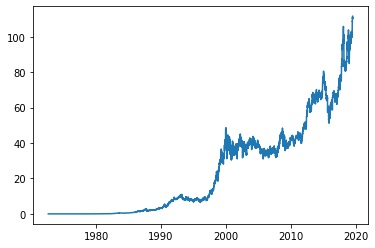

In [47]:
plt.plot(df.ds, df.y)
plt.show()

* instantiate Prophet

In [48]:
model = Prophet()

* fit model

In [49]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values into the future 

In [50]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
12175,2020-06-27
12176,2020-06-28
12177,2020-06-29
12178,2020-06-30
12179,2020-07-01


* plot forecast

In [54]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.522588,91.582111,101.492669
12176,2020-06-28,96.525360,91.739855,101.420796
12177,2020-06-29,96.513828,91.371149,101.429950
12178,2020-06-30,96.534831,91.693102,101.365614
12179,2020-07-01,96.524599,91.945834,101.253291


* plot components

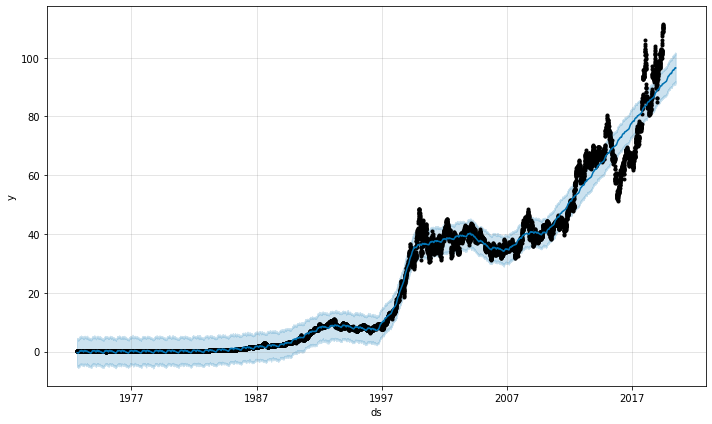

In [56]:
fig1 = model.plot(forecast)

- Compare the Prophet prediction vs the Arima prediction. Use the last 7 values we have in the timeseries as your test data.